In [19]:
from langgraph.graph import START, StateGraph, END
from typing import TypedDict

In [77]:
class Batsman(TypedDict):
    #inputs
    runs : int
    fours : int
    sixes : int
    balls : int

    #need to find
    sr : int
    bpb  : float
    boundary_percent  : float
    summary : str

In [78]:
def gen_sr(state: Batsman):
    sr = (state['runs'] / state['balls']) * 100
    return {"sr" : sr}

In [79]:
def gen_bpb(state: Batsman):
    bpb = state['balls'] / (state['fours'] + state['sixes'])
    return {"bpb" : bpb}

In [80]:
def gen_boundary(state: Batsman):
    boundary_percent = (((state['fours'] * 4) + (state['sixes'] * 6)) / state['runs']) * 100
    return {"boundary_percent" : boundary_percent}

In [81]:
def summary(state: Batsman):
    summary_text = f"""
    Strike Rate       : {round(state['sr'], 2)} 
    Ball per Boundary : {round(state['bpb'], 2)} 
    Boundary %age     : {round(state['boundary_percent'], 2)}
    """
    return {"summary": summary_text}

In [82]:
graph = StateGraph(Batsman)

graph.add_node("gen_sr",gen_sr)
graph.add_node("gen_bpb",gen_bpb)
graph.add_node("gen_boundary",gen_boundary)
graph.add_node("summary",summary)

In [83]:
graph.add_edge(START, "gen_sr")
graph.add_edge(START, "gen_bpb")
graph.add_edge(START, "gen_boundary")

graph.add_edge("gen_sr","summary")
graph.add_edge("gen_bpb","summary")
graph.add_edge("gen_boundary","summary")

graph.add_edge("summary",END)

In [84]:
work = graph.compile()

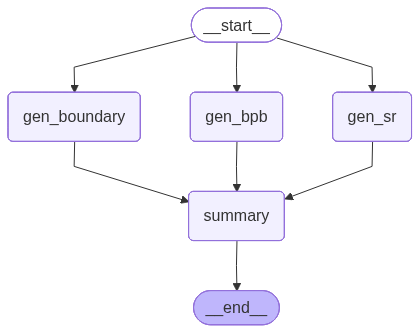

In [85]:
work

In [86]:
start = {
    "runs" : 150,
    "balls" : 100,
    "fours" : 8,
    "sixes" : 4
}
work.invoke(start)

{'runs': 150,
 'fours': 8,
 'sixes': 4,
 'balls': 100,
 'sr': 150.0,
 'bpb': 8.333333333333334,
 'boundary_percent': 37.333333333333336,
 'summary': '\n    Strike Rate       : 150.0 \n    Ball per Boundary : 8.33 \n    Boundary %age     : 37.33\n    '}